## THEOPHILUS YAO DORTUMOR

#### A CLASSIFICATION PROJECT ON CUSTOMER CHURNING PREDICTION OF A TELECOMMUNICATION COMPANY


### BUSINESS PROBLEM STATEMENT

Every business exist because of its customers. More than anything, it is the main responsibility of any business to maintain and at best grow its customer base. However, this is not the narrative of most businesses. They lose customers instead, for reasons the businesses may not be aware of.

Knowing which customer is most likely to cease operating with a particular would go a long way to reduce the rate at which customers leave a business. Business would tend to offer well-tailored offerings to meet customers demand and by extension, a satifactory customer experience. 

On the back of this, this project seeks to predict customers who are likely to cease transacting with a particular business. The company in this context is in the telecommunication industry which offers a large variety of services to its customers. 

This project will deploy the transaction profile of customers to predict whether they will leave the business or not ( customer churning). 

This binary classification problem, that is predicting "Yes" or "No" to a particular customer churning out. 

The data set to be used for this superviser classification project includes
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
!pip install imblearn

### IMPORTING LIBRARIES AND PACKAGES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")


# Importation of Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Importation of Pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Importation of Performance Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score



In [3]:
# loading the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset has 7043 rows and 21 columns


## EXPLORATORY DATA ANALYSIS


In [5]:
# customerID to be dropped because it has no relevance to the prediction. 

df.drop("customerID",axis = "columns", inplace = True)

In [6]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Converting TotalCharges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Percentage of null values
df.isnull().sum() * 100 / len(df) 

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

From the results above, it could be observed that 11 instances have their TotalCharges as null representing 15%. Therefore, mean will be used inplace of these null values.      

In [12]:
df.nunique()      

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
# Seperating categorical and numerical variables for individual exploration
categorical_var = df.select_dtypes(include = "object")
numerical_var = df.select_dtypes(include = np.number)

### EXPORATION OF CATEGORICAL VARIABLES

In [14]:
#Categoorical variables in perspective
for col in categorical_var.columns:
    print(col)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [15]:
# creating a function to explore the categorical variables

def explore_cat(df, c):
    unique_categories = df[c].nunique()
    if unique_categories <= 6:
        print("Summary")
        print("============")
        print(df[c].describe(),"\n")
        sns.countplot(df[c])
        plt.show()
        print("=============================================")
        print("value counts \n")
        print(df[c].value_counts(),"\n")
        print("=============================================")
        print("Missing values: {}".format(df[c].isnull().sum()))
        
    else:
        print("Summary")
        print("===========")
        print(df[c].describe(),"\n")
        sns.countplot(y=df[c])
        plt.show()
        print("=============================================")
        print("value counts \n")
        print(df[c].value_counts(),"\n")
        print("=============================================")
        print("Missing values: {}".format(df[c].isnull().sum()))        

Summary
count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object 



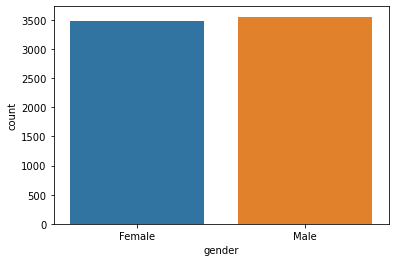

value counts 

Male      3555
Female    3488
Name: gender, dtype: int64 

Missing values: 0


In [16]:
explore_cat(df,"gender")

There is a fair balance in the gender variable. There are no missing values as well.

Summary
count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object 



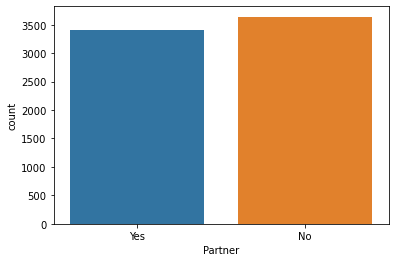

value counts 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Missing values: 0


In [17]:
explore_cat(df, "Partner")

There is a fair balance in the Partnervariable. There are no missing values as well.

Summary
count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object 



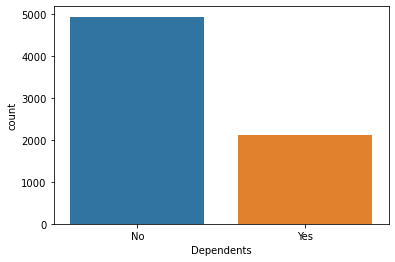

value counts 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Missing values: 0


In [18]:
explore_cat(df,"Dependents")

The "Dependents" variables has a wide imbalance between its unique values. There is no missing value in it.

Summary
count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object 



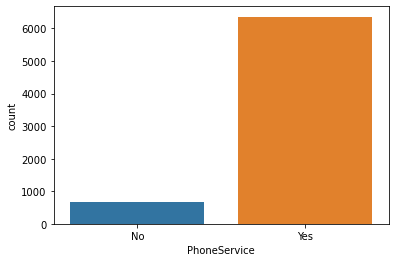

value counts 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

Missing values: 0


In [19]:
explore_cat(df,"PhoneService")

The "PhoneService" variable is highly unbalanced with the "Yes" having 6361 counts ann "No" having 682. However, it has no missing values

Summary
count     7043
unique       3
top         No
freq      3390
Name: MultipleLines, dtype: object 



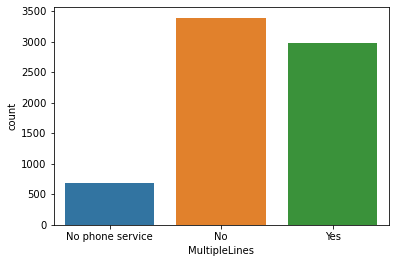

value counts 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Missing values: 0


In [20]:
explore_cat(df,"MultipleLines")


Summary
count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object 



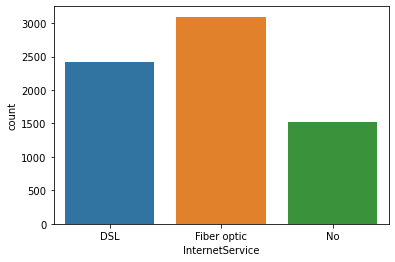

value counts 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

Missing values: 0


In [21]:
explore_cat(df,"InternetService")

Summary
count     7043
unique       3
top         No
freq      3498
Name: OnlineSecurity, dtype: object 



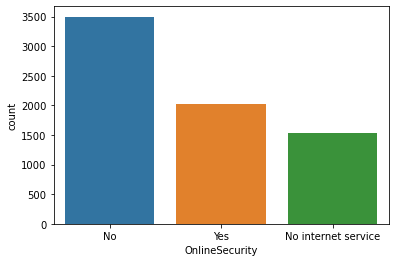

value counts 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

Missing values: 0


In [22]:
explore_cat(df,"OnlineSecurity")

Summary
count     7043
unique       3
top         No
freq      3088
Name: OnlineBackup, dtype: object 



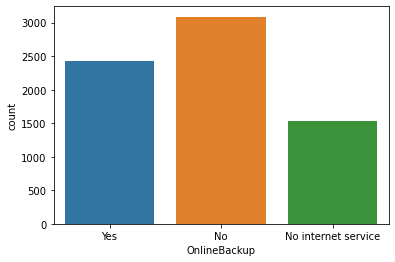

value counts 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

Missing values: 0


In [23]:

explore_cat(df,"OnlineBackup")

Summary
count     7043
unique       3
top         No
freq      3095
Name: DeviceProtection, dtype: object 



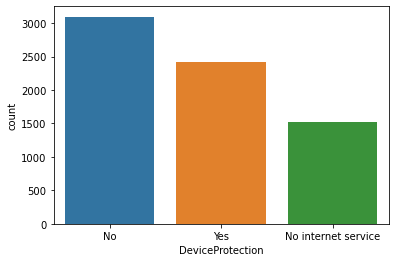

value counts 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

Missing values: 0


In [24]:
explore_cat(df,"DeviceProtection")

Summary
count     7043
unique       3
top         No
freq      3473
Name: TechSupport, dtype: object 



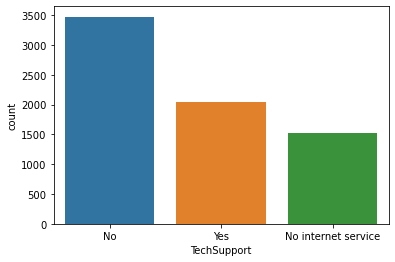

value counts 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

Missing values: 0


In [25]:
explore_cat(df,"TechSupport")

Summary
count     7043
unique       3
top         No
freq      2810
Name: StreamingTV, dtype: object 



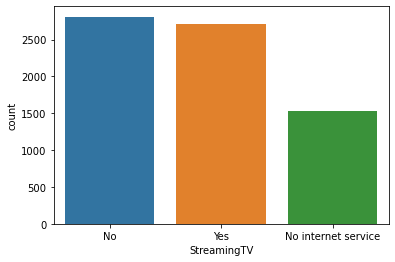

value counts 

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64 

Missing values: 0


In [26]:
explore_cat(df,"StreamingTV")

Summary
count     7043
unique       3
top         No
freq      2785
Name: StreamingMovies, dtype: object 



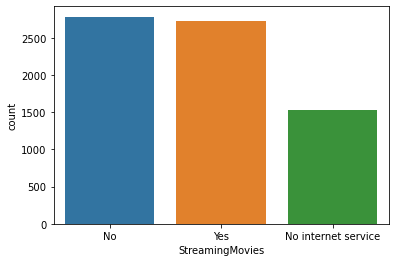

value counts 

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64 

Missing values: 0


In [27]:
explore_cat(df,"StreamingMovies")

Summary
count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object 



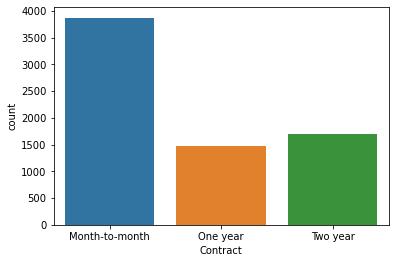

value counts 

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64 

Missing values: 0


In [28]:
explore_cat(df,"Contract")


Summary
count     7043
unique       2
top        Yes
freq      4171
Name: PaperlessBilling, dtype: object 



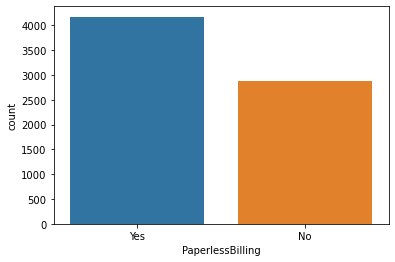

value counts 

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64 

Missing values: 0


In [29]:
explore_cat(df, "PaperlessBilling")

Summary
count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object 



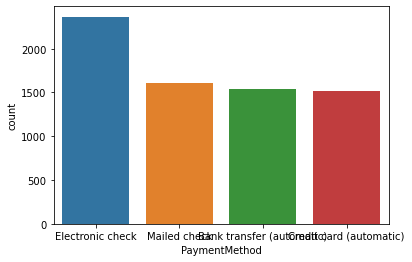

value counts 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64 

Missing values: 0


In [30]:
explore_cat(df,"PaymentMethod")

Unlike most of the variables which are binary, PaymentMethod has four uniques values. Electronic Check PaymeentMethod counts the highest of 2365 with the rest ranging between 1500 and 1600. There are no missing values.


Summary
count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object 



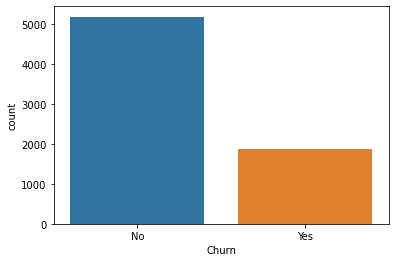

value counts 

No     5174
Yes    1869
Name: Churn, dtype: int64 

Missing values: 0


In [31]:
explore_cat(df,"Churn")

There are no missing values in the "Churn" column which is the target variable. However, the exploratory result shows that there is and imbalance betweeen the values in this column. No-Churn has 5174 value counts whilst Yes-Churn has 1869 value counts. The data has to be balance using SMOTE.  

#### RELATIONSHIP BETWEEN CATEGORICAL VARIABLES


Having explore the nature of the various categorical variables in the data, their association especially with target varibles, "Churn" would be tested. This would inform which variables should be dropped as predictors. 



In [32]:
#creating a test function
from bioinfokit.analys import stat

def test_association(df,x,y):
    table = pd.crosstab(df[x],df[y])
    test = stat()
    test.chisq(df = table)
    
    print("Null hypothesis: {} and {} are independent".format(x,y))
    print("Alternative hypothesis: {} and {} are dependent\n".format(x,y))
    print("Test results")
    print("="*50)
    print("Observed frequency values \n")
    print(table)
    
    print("*"*50)
    #print(test.expected_dataset)
    print("*"*50)
    print(test.summary)
    

In [33]:

test_association(df,"Churn", "gender")

Null hypothesis: Churn and gender are independent
Alternative hypothesis: Churn and gender are dependent

Test results
Observed frequency values 

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.484083   0.486579
Log-likelihood     1      0.484068   0.486586



At a significant value of 0.05 with a resultant p-value of 0.486579, there are is no enough evidence to reject the null hypothesis. In essence, there is no association between gender of a customer and the likelihood of churning.

In [34]:
test_association(df,"Churn","Partner")

Null hypothesis: Churn and Partner are independent
Alternative hypothesis: Churn and Partner are dependent

Test results
Observed frequency values 

Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       158.733  2.13991e-36
Log-likelihood     1       160.64   8.20128e-37



Testing whether customers who have partners are more likely to leave or not. With a p-value of 2.13991e-36 at a significant level of 0.05, is enough evidence to reject the null hypothesis. Meaning the relationship status of a customer is associated with the likelihood of churning.


In [35]:
test_association(df,"Churn", "Dependents")

Null hypothesis: Churn and Dependents are independent
Alternative hypothesis: Churn and Dependents are dependent

Test results
Observed frequency values 

Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       189.129  4.92492e-43
Log-likelihood     1       202.874  4.92722e-46



With a p-value of 4.92492e-43 at a significant value of 0.05, there is enough evidence ot reject the null hypothesis that there is no association between whether a customer has dependence and his likelihood of churning.



In [36]:
test_association(df, "Churn", "PhoneService")

Null hypothesis: Churn and PhoneService are independent
Alternative hypothesis: Churn and PhoneService are dependent

Test results
Observed frequency values 

PhoneService   No   Yes
Churn                  
No            512  4662
Yes           170  1699
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.915033   0.338783
Log-likelihood     1      0.925475   0.336041



A p-value of 0.338783 at significant level of 0.05 indicates there is not enough evidence to reject the null hypothesis of independence between customer churning and whether the customer uses phone services. However, understanding of the business shows that there phone service usage is an important factor regardless the statistical evidence. 

In [37]:
test_association(df,"Churn","MultipleLines")

Null hypothesis: Churn and MultipleLines are independent
Alternative hypothesis: Churn and MultipleLines are dependent

Test results
Observed frequency values 

MultipleLines    No  No phone service   Yes
Churn                                      
No             2541               512  2121
Yes             849               170   850
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            2       11.3304  0.00346438
Log-likelihood     2       11.2866  0.00354111



p-value of 0.00346438 at a significant level of 0.05 there is enough evidence to reject the null hypothesis. There is an association between customer churning the usage of multiple lines.

In [38]:
test_association(df,"Churn","InternetService")

Null hypothesis: Churn and InternetService are independent
Alternative hypothesis: Churn and InternetService are dependent

Test results
Observed frequency values 

InternetService   DSL  Fiber optic    No
Churn                                   
No               1962         1799  1413
Yes               459         1297   113
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       732.31   9.57179e-160
Log-likelihood     2       782.818  1.03095e-170



With a p-value of 9.57179e-160 at a significant level of 0.05, there is enough evidence to reject the null hypothesis that there is there is no association or independence exists between customers using multiple lines and their liklihood of churning.

In [39]:
test_association(df, "Churn", "OnlineSecurity")

Null hypothesis: Churn and OnlineSecurity are independent
Alternative hypothesis: Churn and OnlineSecurity are dependent

Test results
Observed frequency values 

OnlineSecurity    No  No internet service   Yes
Churn                                          
No              2037                 1413  1724
Yes             1461                  113   295
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       849.999  2.66115e-185
Log-likelihood     2       911.044  1.47661e-198



At a significant level of 0.05 with a p-value of 2.66115e-185, there is enough evidence to reject the null hypothesis. There is an association between customer's security online and the likelihood of churning.

In [40]:
test_association(df, "Churn", "OnlineBackup")

Null hypothesis: Churn and OnlineBackup are independent
Alternative hypothesis: Churn and OnlineBackup are dependent

Test results
Observed frequency values 

OnlineBackup    No  No internet service   Yes
Churn                                        
No            1855                 1413  1906
Yes           1233                  113   523
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       601.813  2.07976e-131
Log-likelihood     2       659.117  7.49267e-144



With a p-value of 2.07976e-131 and at a significant level of 0.05, there is enough evidence of that the null to reject the null hypothesis. There if therefore association between whether a customer has online backup and the chance of the customer leaving.

In [41]:
test_association(df, "Churn","DeviceProtection")

Null hypothesis: Churn and DeviceProtection are independent
Alternative hypothesis: Churn and DeviceProtection are dependent

Test results
Observed frequency values 

DeviceProtection    No  No internet service   Yes
Churn                                            
No                1884                 1413  1877
Yes               1211                  113   545
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       558.419  5.50522e-122
Log-likelihood     2       618.614  4.67484e-135



With a p-value of 5.50522e-122 at a significant value of 0.05, there is enough evidence to reject null hypothesis that there independence between whether a customer's is protected and the likelihood of churning.

In [42]:

test_association(df,"Churn" ,"TechSupport")

Null hypothesis: Churn and TechSupport are independent
Alternative hypothesis: Churn and TechSupport are dependent

Test results
Observed frequency values 

TechSupport    No  No internet service   Yes
Churn                                       
No           2027                 1413  1734
Yes          1446                  113   310
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       828.197  1.44308e-180
Log-likelihood     2       887.714  1.71904e-193



With a p-value at significant value of 0.05, there is enough evidence to reject the null hypothesis that there is independence between customers receiving technical support and the likelihood of leaving the company as a customer. 

In [43]:
test_association(df,"Churn", "StreamingTV")

Null hypothesis: Churn and StreamingTV are independent
Alternative hypothesis: Churn and StreamingTV are dependent

Test results
Observed frequency values 

StreamingTV    No  No internet service   Yes
Churn                                       
No           1868                 1413  1893
Yes           942                  113   814
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       374.204  5.52899e-82
Log-likelihood     2       449.456  2.52305e-98



With a p-value of 5.52899e-82 at a significant value of 0.0, there is enough evidence to reject the null hypothesis. There is association between customers streaming TV online and their likelihood of churning.

In [44]:
test_association(df, "Churn","StreamingMovies")

Null hypothesis: Churn and StreamingMovies are independent
Alternative hypothesis: Churn and StreamingMovies are dependent

Test results
Observed frequency values 

StreamingMovies    No  No internet service   Yes
Churn                                           
No               1847                 1413  1914
Yes               938                  113   818
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       375.661  2.66776e-82
Log-likelihood     2       450.765  1.31082e-98



With a p-value of 2.66776e-82 at a significant value of 0.05, there is enough evidence for rejecting the null hypothesis of independence between customers streaming movies and the likelihood of churning. 

In [45]:
test_association(df, "Churn", "Contract")

Null hypothesis: Churn and Contract are independent
Alternative hypothesis: Churn and Contract are dependent

Test results
Observed frequency values 

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Yes                 1655       166        48
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       1184.6   5.86304e-258
Log-likelihood     2       1386.81  7.2127e-302



With a p-value of 5.86304e-258 at a significant level of 0.05, there is enough evidence to reject the null hypothesis that there is independence between contract and churning. 

In [46]:
test_association(df, "Churn", "PaperlessBilling")

Null hypothesis: Churn and PaperlessBilling are independent
Alternative hypothesis: Churn and PaperlessBilling are dependent

Test results
Observed frequency values 

PaperlessBilling    No   Yes
Churn                       
No                2403  2771
Yes                469  1400
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       258.278  4.07335e-58
Log-likelihood     1       269.422  1.51657e-60



With a p-value of 4.07335e-58 at a significant level of 0.05, there is enough evidence to reject the null hypothesis. There is association between paperlessbilling and churning.

In [47]:
test_association(df, "Churn","PaymentMethod")

Null hypothesis: Churn and PaymentMethod are independent
Alternative hypothesis: Churn and PaymentMethod are dependent

Test results
Observed frequency values 

PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1286                     1290   
Yes                                  258                      232   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         1294          1304  
Yes                        1071           308  
**************************************************
**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            3       648.142  3.68235e-140
Log-likelihood     3       627.09   1.35033e-135



With a p-value of 3.68235e-140 at a significant value of 0.05, there is enough evidence to reject the null hypothesis. There is an association between payment methods and customer churning.

### EXPLORING THE NUMERICAL VALUES

In [48]:
# getting the numerical columns of the dataset.
for col in numerical_var.columns:
    print (col)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [49]:
# plotting a histogram and boxplot to show the distribution of the variables
def plot_chart(df, col):
    import matplotlib.gridspec as gridspec
    import matplotlib.style as style
    style.use("fivethirtyeight")
    
    #customising the visualisation
    fig = plt.figure(constrained_layout = True, figsize = (8,6))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title("Histogram")
    sns.distplot(df.loc[:,col],norm_hist = True, ax = ax1)
    
    ax2 = fig.add_subplot(grid[:, 2])
    ax2.set_title("Boxplot")
    sns.boxplot(df.loc[:, col], orient = "v", ax = ax2)
    
    


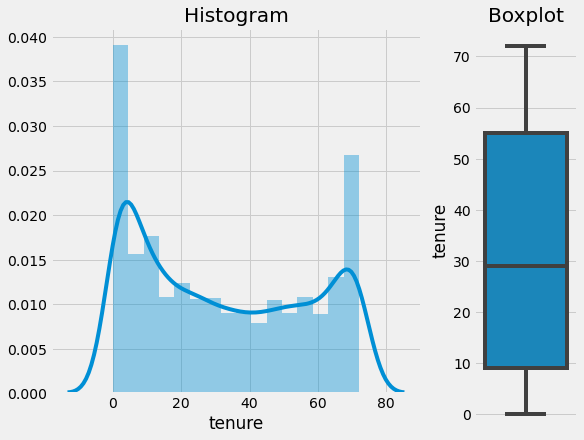

In [50]:
plot_chart(df,"tenure")

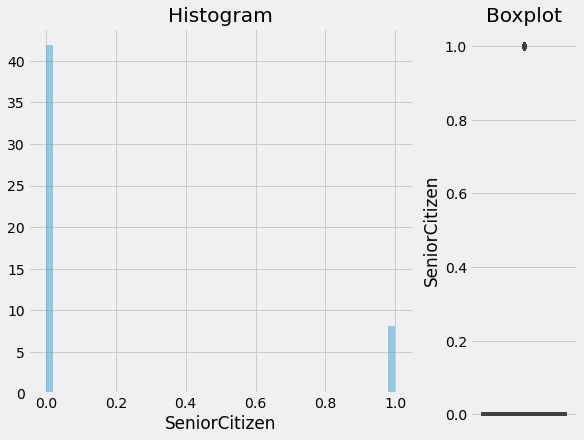

In [51]:
plot_chart(df,"SeniorCitizen")

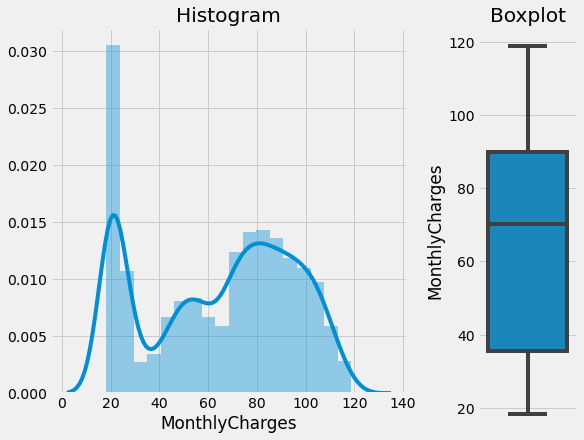

In [52]:
plot_chart(df, "MonthlyCharges")

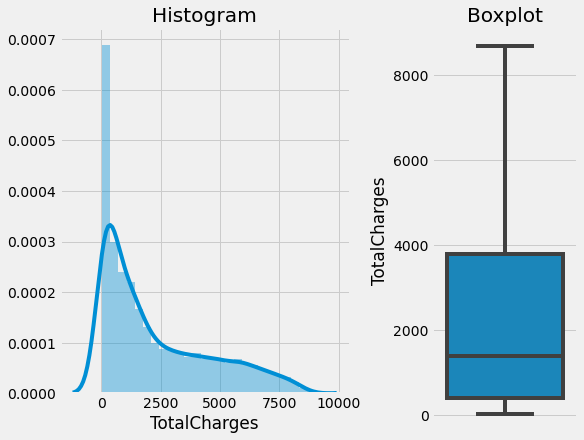

In [53]:
plot_chart(df, "TotalCharges")

The TotalCharges, for the histogram, is right skewed. Having the mean below the median as indicated in the boxplot. 

In [54]:
cor = numerical_var.corr()

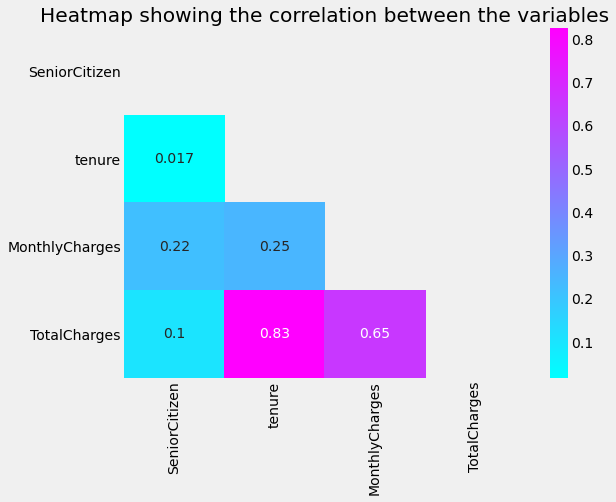

In [55]:
plt.figure(figsize = (8,6))
matrix = np.triu(cor)
sns.heatmap(cor, annot = True, cmap = 'cool', mask = matrix)
plt.title("Heatmap showing the correlation between the variables")
plt.show()


From the correlation heatmap above, it could observed that, TotalCharges have very high correlation of 0.83 with tenure and and 0.65 MonthlyCharges. The other variables have lower correlations with the highsest among them being 0.25 which exist between MonthlyCharges and teunure. Hence, the TotalCharges would be dropped as a predictor in the prediction. There would therefore, be no need to take take care of the its missing values. 

## DATA PREPROCESSING FOR MODELLING

In [56]:
# dropping irrelevant features 

df.drop(columns =["TotalCharges","gender"], axis = 1, inplace = True)

In [57]:
df.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes


In [58]:
# function to get all the unique variables of the various columns.
def  col_unique_values(df):
    for column in df:
        print("{}: {}".format(column, df[column].unique()))

In [59]:
 col_unique_values(df)

SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn: ['No' 'Yes']


In [60]:
# replacing the "No internet service" values with "No" under internet related columns.
# This is because saying "No internet serivce" is the same as saying "No" I dont use that particular service in 
#that column

df["OnlineSecurity"].replace({"No internet service":"No"},inplace=True)
df["OnlineBackup"].replace({"No internet service":"No"},inplace=True)
df["DeviceProtection"].replace({"No internet service":"No"},inplace=True)
df["TechSupport"].replace({"No internet service":"No"},inplace=True)
df["StreamingTV"].replace({"No internet service":"No"},inplace=True)
df["StreamingMovies"].replace({"No internet service":"No"},inplace=True)
df["MultipleLines"].replace({"No phone service":"No"},inplace=True)

In [61]:
# function to get all the unique variables of the various columns.
def  col_unique_values(df):
    for column in df:
        print("{}: {}".format(column, df[column].unique()))

In [62]:
col_unique_values(df)

SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn: ['No' 'Yes']


In [63]:
# OneHotEncoding to convert all the categorical values to numerical for modelling
df = pd.get_dummies(df, columns=["Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                            "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
                            "PaymentMethod"],drop_first = True)

In [64]:
# segregating the data into dependent and independent varialbles ie x and y
X = df.drop(["Churn"],axis =1)
y1 = df["Churn"]
y2 = pd.get_dummies(y1)
y = y2.drop(columns = "No")

#### Balancing the data

In [65]:
import imblearn
from imblearn.over_sampling import SMOTE

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X, y)

Splitting the data into train and test sets

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, stratify=y,random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4930, 21) (4930, 1)
(2113, 21) (2113, 1)


The train set will be having 4930 rows and 21 columns to train the various models while the set will be having 2113 rows with the same number of columns of the train set.

## BUILDING  MODELS TO PREDICT  

### 1. LOGISTIC REGRESSION

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# hyperparameter tunning with grid search and cross validation for Logistic regression

# instantiating the logistic regression model

lrg = LogisticRegression()
param_grid = {'C':[0.01,0.05,0.5,0.1,1,5,10,50,70,100]}
grid_lr = GridSearchCV(lrg, param_grid, cv = 6)
grid_lr.fit(X_train, y_train)

print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_lr.best_score_))
print("Best parameter:", grid_lr.best_params_)
print("*********************************************************")


Best Cross-Validation Accuracy and Parameter
*********************************************************
Best cross-validation accuracy: 0.81
Best parameter: {'C': 1}
*********************************************************


In [70]:
# Logistic Regression with tuned hyper-parameter

# instantiating the Logistic Regression
lrg = LogisticRegression( C = 1)

# fitting the model
lrg.fit(X_train, y_train)

# accuracy score for train and test

lrg_train_acc = lrg.score(X_train, y_train)
lrg_test_acc = lrg.score(X_test, y_test)

print("Train Accuracy: {:.2f}".format(lrg_train_acc))
print("Test Accuracy: {:.2f} ".format(lrg_test_acc))
print("Percentage of overfitting {:.2f}%".format(((lrg_train_acc-lrg_test_acc)/lrg_train_acc*100)))

lrg_prediction=grid_lr.predict(X_test)

Train Accuracy: 0.81
Test Accuracy: 0.80 
Percentage of overfitting 1.30%


### 2. DECISION TREE CLASSIFIER

In [71]:
from sklearn.tree import DecisionTreeClassifier 

In [72]:
# Tunning the hyper parameter with gridsearch and cross validation

# Instantiating the model

tree = DecisionTreeClassifier(random_state = 0)
param_grid = {"max_features": [1,2,3,4,5,6,7,8,9,10], "max_leaf_nodes":[1,2,3,4,5,6,7,8,9,10]}
grid_tree = GridSearchCV(tree,param_grid = param_grid, cv = 6)
grid_tree.fit(X_train,y_train)

print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_tree.best_score_))
print("Best parameter:", grid_tree.best_params_)
print("*********************************************************")

Best Cross-Validation Accuracy and Parameter
*********************************************************
Best cross-validation accuracy: 0.79
Best parameter: {'max_features': 10, 'max_leaf_nodes': 4}
*********************************************************


In [73]:
# Instantiating the modelling by incorporating the best parameters
tree = DecisionTreeClassifier(max_features = 10, max_leaf_nodes = 4,random_state = 0)

# fitting the model 
tree.fit(X_train,y_train)

#accuracies of train and test scores
tr_acc = tree.score(X_train,y_train)
te_acc = tree.score(X_test,y_test)

print("train accuracy: {:.2f}".format(tr_acc))
print("test_accuracy: {:.2f}".format(te_acc))

print("Percentage of overfitting: {:.2f}%".format(((tr_acc-te_acc)/tr_acc*100)))
tree_prediction = grid_tree.predict(X_test)

train accuracy: 0.79
test_accuracy: 0.79
Percentage of overfitting: 0.02%


### 3. SUPPORT VECTOR MACHINE

In [74]:
from sklearn.svm import SVC

In [75]:
# hyperparameter tuning with pipeline
# the pipeline was used here because there was the need for the data to be scaled before the model is applied on it.
# the standardscaler will be used in this instance. 

pipe  = Pipeline([("Scaler", StandardScaler()), ("SVC", SVC(probability=True))])
param_grid = {"SVC__C":[0.001,0.01,0.1,1,10,100], "SVC__gamma":[0.001, 0.01,0.1,1,10,100]}
grid_svc = GridSearchCV(pipe, param_grid = param_grid, cv = 6)
grid_svc.fit(X_train, y_train)

print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_svc.best_score_))
print("Best parameter:", grid_svc.best_params_)
print("*********************************************************")

Best Cross-Validation Accuracy and Parameter
*********************************************************
Best cross-validation accuracy: 0.80
Best parameter: {'SVC__C': 10, 'SVC__gamma': 0.001}
*********************************************************


In [76]:
# modelling with SVC using tuned hyperparaeter

# instantiating the SVC model
svc = Pipeline([("Scaler",StandardScaler()), ("SVC",SVC(C=10,gamma=0.001,probability=True))])
svc_model = svc.fit(X_train,y_train)

svc_train_score = svc.score(X_train, y_train)
svc_test_score = svc.score(X_test, y_test)

print("Train Accuracy: {:.2f}".format(svc_train_score))
print("Test Accuracy: {:.2f} ".format(svc_test_score))
print("Percentage of overfitting {:.2f}%".format(((svc_train_score-svc_test_score)/svc_train_score*100)))

svc_prediction=grid_svc.predict(X_test)

Train Accuracy: 0.81
Test Accuracy: 0.80 
Percentage of overfitting 1.00%


### 4. GRADIENT BOOSTING CLASSIFIER

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
# hyperparameter tunning 
gbc = GradientBoostingClassifier(n_estimators = 300, max_depth=1, random_state=0)
param_grid = {"max_features":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[1,2,3,4,5,6,7,8,9,10]}
grid_gbc = GridSearchCV(gbc, param_grid = param_grid, cv = 6)

grid_gbc.fit(X_train,y_train)

# fitting the model to get the best parameters
grid_gbc.fit(X_train, y_train)
print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_gbc.best_score_))
print("Best parameter:", grid_gbc.best_params_)
print("*********************************************************")

Best Cross-Validation Accuracy and Parameter
*********************************************************
Best cross-validation accuracy: 0.80
Best parameter: {'max_features': 2, 'max_leaf_nodes': 2}
*********************************************************


In [79]:
# Instantiating the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators = 500, max_depth=1, max_features = 2, max_leaf_nodes  = 2,random_state=0)

# fit the model to the data
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

gbc_train_acc = gbc.score(X_train, y_train)
gbc_test_acc = gbc.score(X_test, y_test)

print("Train Accuracy: {:.2f}".format(gbc_train_acc))
print("Test Accuracy: {:.2f} ".format(gbc_test_acc))
print("Percentage of overfitting {:.2f}%".format(((gbc_train_acc-gbc_test_acc)/gbc_train_acc*100)))

gbc_prediction=grid_gbc.predict(X_test)

Train Accuracy: 0.81
Test Accuracy: 0.80 
Percentage of overfitting 0.88%


### 5. ADA BOOST CLASSIFIER


In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:

#instantiating Decision Tree as the base estimator
dt = DecisionTreeClassifier(max_depth = 1, random_state = 0)

# Instantiating the AdaBoost classifier
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators =60, random_state = 0 )

#fitting the AdaBoost model to the data
adb_clf.fit(X_train,y_train)

print("Train Accuracy of ADB_clf: {:.2f}".format(adb_clf.score(X_train,y_train)))
print("Test Accuracy ADB_clf: {:.2f} ".format(adb_clf.score(X_test,y_test)))
# print("Percentage of overfitting {:.2f}%".format(((adb_clf_train_acc-gbc_test_acc)/gbc_train_acc*100)))

adb_clf_prediction= adb_clf.predict(X_test)


Train Accuracy of ADB_clf: 0.81
Test Accuracy ADB_clf: 0.80 


### 6. RANDOM FOREST CLASSIFIER

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:

# hyperparameter tunning
# the parameters used here are max_depth and max_features

# instantiating the Random Forest Model

rfc  = RandomForestClassifier(random_state = 0)
param_grid = {"max_depth":[1,2,3,4,5,6,7,8,9,10], 
              "max_features":[1,2,3,4,5,6,7,8,9,10], 
              "max_leaf_nodes": [1,2,3,4,5,6,7,8,9,10]}

grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv= 6)

# fitting the model to get the best parameters
grid_rfc.fit(X_train, y_train)
print("Best Cross-Validation Accuracy and Parameter")
print("*********************************************************")
print("Best cross-validation accuracy: {:.2f}".format(grid_rfc.best_score_))
print("Best parameter:", grid_rfc.best_params_)
print("*********************************************************")

Best Cross-Validation Accuracy and Parameter
*********************************************************
Best cross-validation accuracy: 0.79
Best parameter: {'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 10}
*********************************************************


In [84]:
# modelling with the tuned parameters

# Instanstiating the Random Forest Model
rfc = RandomForestClassifier(max_depth=5, max_features=4, max_leaf_nodes=10)

# fitting the model to the data
rfc.fit(X_train, y_train)

rfc_train_score = rfc.score(X_train,y_train)
rfc_test_score = rfc.score(X_test, y_test)

print("Train Accuracy: {:.2f}".format(rfc_train_score))
print("Test Accuracy: {:.2f} ".format(rfc_test_score))
print("Percentage of overfitting {:.2f}%".format(((rfc_train_score-rfc_test_score)/rfc_train_score*100)))

rfc_prediction=grid_rfc.predict(X_test)

Train Accuracy: 0.79
Test Accuracy: 0.79 
Percentage of overfitting 0.81%


## MODEL SELECTION, AND EVALUATION


In [85]:
# Importation of Performance Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

### MODEL SELECTION

#### CONFUSION MATRIX

In [86]:
from sklearn.metrics import confusion_matrix

print("\nDecision Tree:")
print(confusion_matrix(y_test, tree_prediction))


print("\nLogistic Regression:")
print(confusion_matrix(y_test, lrg_prediction))

print("\nSVC:")
print(confusion_matrix(y_test, svc_prediction))

print("\nRandom Forest:")
print(confusion_matrix(y_test, rfc_prediction))

print("\nGradient Boost:")
print(confusion_matrix(y_test, gbc_prediction))

print("\nAda Boost:")
print(confusion_matrix(y_test, adb_clf_prediction))


Decision Tree:
[[1448  104]
 [ 339  222]]

Logistic Regression:
[[1383  169]
 [ 260  301]]

SVC:
[[1389  163]
 [ 263  298]]

Random Forest:
[[1460   92]
 [ 349  212]]

Gradient Boost:
[[1406  146]
 [ 277  284]]

Ada Boost:
[[1383  169]
 [ 251  310]]


From the confusion matrix, Random Forest had the highes True positive of 1460 and a True Negative 212. Gradient Boost also had a True Positive of 1406 and True negative of 284. A comparison of the two models, slightly puts GBC ahead of RFC. 

### CLASSIFICATION REPORT

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_prediction, target_names=["Churn Yes", "Churn No"]))

              precision    recall  f1-score   support

   Churn Yes       0.81      0.93      0.87      1552
    Churn No       0.68      0.40      0.50       561

    accuracy                           0.79      2113
   macro avg       0.75      0.66      0.68      2113
weighted avg       0.78      0.79      0.77      2113



In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lrg_prediction, target_names=["Churn Yes", "Churn No"]))

              precision    recall  f1-score   support

   Churn Yes       0.84      0.89      0.87      1552
    Churn No       0.64      0.54      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc_prediction, target_names=["Churn Yes", "Churn No"]))

              precision    recall  f1-score   support

   Churn Yes       0.84      0.89      0.87      1552
    Churn No       0.65      0.53      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_prediction, target_names=["Churn", "Churn No"]))


              precision    recall  f1-score   support

       Churn       0.81      0.94      0.87      1552
    Churn No       0.70      0.38      0.49       561

    accuracy                           0.79      2113
   macro avg       0.75      0.66      0.68      2113
weighted avg       0.78      0.79      0.77      2113



In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gbc_prediction, target_names=["Churn Yes", "Churn No"]))

              precision    recall  f1-score   support

   Churn Yes       0.84      0.91      0.87      1552
    Churn No       0.66      0.51      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, adb_clf_prediction, target_names=["Churn Yes", "Churn No"]))

              precision    recall  f1-score   support

   Churn Yes       0.85      0.89      0.87      1552
    Churn No       0.65      0.55      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



The f1 score of all the models meet at par with a value 0.87. A further analysis for selection would be made using the ROc.

In [93]:
r_probs = [0 for i in range(len(y_test))]
tree_probs = tree.predict_proba(X_test)
lrg_probs = lrg.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
rfc_probs = rfc.predict_proba(X_test)
gbc_probs = gbc.predict_proba(X_test)
adb_clf_probs = adb_clf.predict_proba(X_test)

tree_probs = tree_probs[:,1]
lrg_probs = lrg_probs[:, 1]
svc_probs = svc_probs[:, 1]
rfc_probs = rfc_probs[:,1]
gbc_probs = gbc_probs[:, 1]
adb_clf_probs = adb_clf_probs[:, 1]

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test,tree_probs)
lrg_fpr, lrg_tpr, _ = roc_curve(y_test, lrg_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)#
rfc_fpr, rfc_tpr, _ = roc_curve(y_test,rfc_probs)
gbc_fpr, gbc_tpr, _ = roc_curve(y_test,gbc_probs)
adb_clf_fpr, adb_clf_tpr, _ = roc_curve(y_test,adb_clf_probs)


r_auc = roc_auc_score(y_test, r_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
lrg_auc = roc_auc_score(y_test,lrg_probs)
svc_auc = roc_auc_score(y_test,svc_probs)
rfc_auc = roc_auc_score(y_test,rfc_probs)
gbc_auc = roc_auc_score(y_test, gbc_probs)
adb_clf_auc = roc_auc_score(y_test,adb_clf_probs)

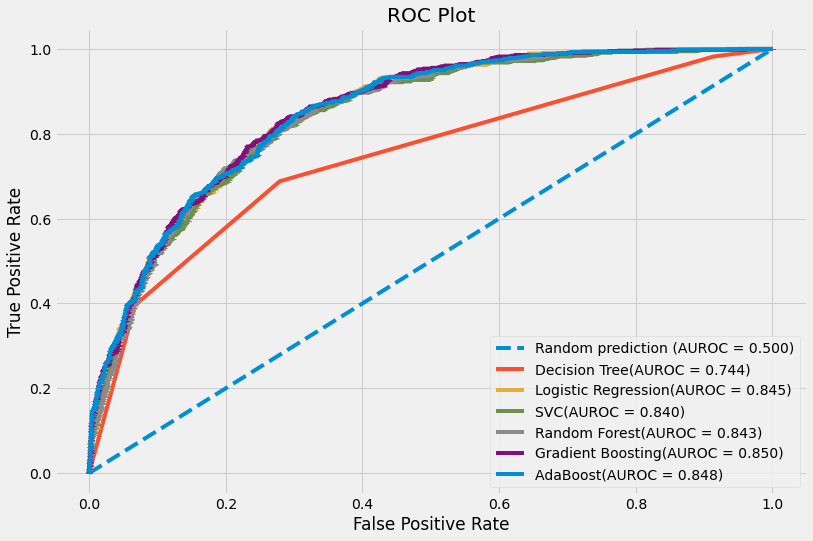

In [94]:
plt.figure(figsize=(12,8))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(tree_fpr, tree_tpr, marker='_', label='Decision Tree(AUROC = %0.3f)' % tree_auc)
plt.plot(lrg_fpr, lrg_tpr, marker='_', label='Logistic Regression(AUROC = %0.3f)' % lrg_auc)
plt.plot(svc_fpr, svc_tpr, marker='_', label='SVC(AUROC = %0.3f)' % svc_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='_', label='Random Forest(AUROC = %0.3f)' % rfc_auc)
plt.plot(gbc_fpr, gbc_tpr, marker='_', label='Gradient Boosting(AUROC = %0.3f)' % gbc_auc)
plt.plot(adb_clf_fpr, adb_clf_tpr, marker='_', label='AdaBoost(AUROC = %0.3f)' % adb_clf_auc)

import matplotlib.pyplot as plt

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()

The AU ROC gives a gives a small margin of difference between Random Forest and Gradient Boosting. That of RFC is 0.843 and GBC is 0.850. From this the best model to be selected for prediction is the Graident Boosting Classifier. 

Using the Gradient Boosting Classifier, we would have and accuracy of 0.80.Meaning it this model is deployed, it would be able to predict with 80% accuracy customers who would stop transacting with the telecommunication company. This would help the company the category of customers who would be leaving and otherwise. This knowledge is going to enable the company take better decisions on how to retain customers and improve general business operations.